#### 使用查询引擎
##### 运行查询引擎
现在让我们使用此数据集提出一些问题。

In [4]:
! pip install  graphrag  

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/9b/b9/2608b3e7fac0cd8f86477497c7d757f9ff5b9f338f3cd9068770a4e5637d/graphrag-0.3.6-py3-none-any.whl (389 kB)


## 由于平台默认搜索使用脚本关闭配置
### 运行后重启环境

In [3]:
 
import os
import sys
import re

def find_graphrag_package():
    """找到graphrag包的安装路径"""
    try:
        import graphrag
        package_path = os.path.dirname(graphrag.__file__)
        return package_path
    except ImportError:
        print("graphrag包没有安装。")
        sys.exit(1)

 
 

# 第一步：找到graphrag包的路径
package_path = find_graphrag_package()
print(f"graphrag包的路径: {package_path}")

# 第二步：找到openai.py文件 
openai_file_path = os.path.join(package_path, 'query', 'llm', 'oai', 'openai.py')

if os.path.exists(openai_file_path):
    print(f"找到文件: {openai_file_path}")
    !cp fix_openai.py $openai_file_path
    
else:
    print(f"未找到openai.py文件: {openai_file_path}")
    sys.exit(1)
! cat $openai_file_path

# 第二步：找到chat_openai.py文件 
chat_openai_file_path = os.path.join(package_path, 'query', 'llm', 'oai', 'chat_openai.py')

if os.path.exists(chat_openai_file_path):
    print(f"找到文件: {chat_openai_file_path}")
    !cp fix_chat_openai.py $chat_openai_file_path
    
else:
    print(f"未找到chat_openai.py文件: {chat_openai_file_path}")
    sys.exit(1)
! cat $chat_openai_file_path

graphrag包的路径: /usr/local/lib/python3.10/dist-packages/graphrag
找到文件: /usr/local/lib/python3.10/dist-packages/graphrag/query/llm/oai/openai.py

# Copyright (c) 2024 Microsoft Corporation.
# Licensed under the MIT License

"""OpenAI Wrappers for Orchestration."""

import logging
from typing import Any

from tenacity import (
    AsyncRetrying,
    RetryError,
    Retrying,
    retry_if_exception_type,
    stop_after_attempt,
    wait_exponential_jitter,
)

from graphrag.query.llm.base import BaseLLMCallback
from graphrag.query.llm.oai.base import OpenAILLMImpl
from graphrag.query.llm.oai.typing import (
    OPENAI_RETRY_ERROR_TYPES,
    OpenaiApiType,
)

log = logging.getLogger(__name__)


class OpenAI(OpenAILLMImpl):
    """Wrapper for OpenAI Completion models."""

    def __init__(
        self,
        api_key: str,
        model: str,
        deployment_name: str | None = None,
        api_base: str | None = None,
        api_version: str | None = None,
        api_type: OpenaiApiTyp

这里需要设置平台的api_key,从`https://open.bigmodel.cn/`获取

In [1]:
import pandas as pd
import os
from pathlib import Path

os.environ["GRAPHRAG_LLM_API_KEY"] = 'key'

os.environ["GRAPHRAG_LLM_API_BASE"] = 'https://open.bigmodel.cn/api/paas/v4'

os.environ["GRAPHRAG_EMBEDDING_API_BASE"] = 'https://open.bigmodel.cn/api/paas/v4'

os.environ["GRAPHRAG_EMBEDDING_API_KEY"] = 'key'

os.environ["GRAPHRAG_API_KEY"] = 'key'



以下是使用全局搜索提出高级问题的示例：

In [2]:
!python -m graphrag.query --root ./coplay_analysis_graph --method global "这里面有什么基准么"



creating llm client with {'api_key': 'REDACTED,len=49', 'type': "openai_chat", 'model': 'glm-4-airx', 'max_tokens': 4000, 'temperature': 0.1, 'top_p': 0.99, 'n': 1, 'request_timeout': 180.0, 'api_base': 'https://open.bigmodel.cn/api/paas/v4', 'api_version': None, 'organization': None, 'proxy': None, 'cognitive_services_endpoint': None, 'deployment_name': None, 'model_supports_json': False, 'tokens_per_minute': 150000, 'requests_per_minute': 500, 'max_retries': 10, 'max_retry_wait': 10.0, 'sleep_on_rate_limit_recommendation': True, 'concurrent_requests': 25}

SUCCESS: Global Search Response:
The dataset provided does not include any explicit benchmarks or standards for comparison [Data: Reports (0, 1)]. This implies that any analysis conducted on this dataset will need to establish its own criteria for evaluation, as there are no predefined benchmarks to measure against. This could affect the interpretation of results, as findings will not be able to be directly compared to industry s

以下是使用本地搜索询问有关特定角色的更具体问题的示例：

In [4]:
!python -m graphrag.query --root ./coplay_analysis_graph --method local "这里面有什么基准么"





INFO: Vector Store Args: {}
[2024-09-29T10:48:54Z WARN  lance::dataset] No existing dataset at /mnt/ceph/develop/jiawei/glm-cookbook/demo/graphrag/coplay_analysis_graph/output/20240929-175517/artifacts/lancedb/entity_description_embeddings.lance, it will be created
creating llm client with {'api_key': 'REDACTED,len=49', 'type': "openai_chat", 'model': 'glm-4-airx', 'max_tokens': 4000, 'temperature': 0.1, 'top_p': 0.99, 'n': 1, 'request_timeout': 180.0, 'api_base': 'https://open.bigmodel.cn/api/paas/v4', 'api_version': None, 'organization': None, 'proxy': None, 'cognitive_services_endpoint': None, 'deployment_name': None, 'model_supports_json': False, 'tokens_per_minute': 150000, 'requests_per_minute': 500, 'max_retries': 10, 'max_retry_wait': 10.0, 'sleep_on_rate_limit_recommendation': True, 'concurrent_requests': 25}
creating embedding llm client with {'api_key': 'REDACTED,len=49', 'type': "openai_embedding", 'model': 'embedding-2', 'max_tokens': 4000, 'temperature': 0, 'top_p': 1,

In [4]:
import os

import pandas as pd
import tiktoken

from graphrag.query.context_builder.entity_extraction import EntityVectorStoreKey
from graphrag.query.indexer_adapters import (
    read_indexer_covariates,
    read_indexer_entities,
    read_indexer_relationships,
    read_indexer_reports,
    read_indexer_text_units,
)
from graphrag.query.input.loaders.dfs import (
    store_entity_semantic_embeddings,
)
from graphrag.query.llm.oai.chat_openai import ChatOpenAI
from graphrag.query.llm.oai.embedding import OpenAIEmbedding
from graphrag.query.llm.oai.typing import OpenaiApiType
from graphrag.query.question_gen.local_gen import LocalQuestionGen
from graphrag.query.structured_search.local_search.mixed_context import (
    LocalSearchMixedContext,
)
from graphrag.query.structured_search.local_search.search import LocalSearch
from graphrag.vector_stores.lancedb import LanceDBVectorStore

### Load text units and graph data tables as context for local search

- In this test we first load indexing outputs from parquet files to dataframes, then convert these dataframes into collections of data objects aligning with the knowledge model.

### Load tables to dataframes

In [5]:
INPUT_DIR = "./coplay_analysis_graph/output/20240715-183526/artifacts/"
LANCEDB_URI = "./lancedb"

COMMUNITY_REPORT_TABLE = "create_final_community_reports"
ENTITY_TABLE = "create_final_nodes"
ENTITY_EMBEDDING_TABLE = "create_final_entities"
RELATIONSHIP_TABLE = "create_final_relationships"
COVARIATE_TABLE = "create_final_covariates"
TEXT_UNIT_TABLE = "create_final_text_units"
COMMUNITY_LEVEL = 2

#### Read entities

In [6]:
# read nodes table to get community and degree data
entity_df = pd.read_parquet(f"{INPUT_DIR}/{ENTITY_TABLE}.parquet")
entity_embedding_df = pd.read_parquet(f"{INPUT_DIR}/{ENTITY_EMBEDDING_TABLE}.parquet")

entities = read_indexer_entities(entity_df, entity_embedding_df, COMMUNITY_LEVEL)

# load description embeddings to an in-memory lancedb vectorstore
# to connect to a remote db, specify url and port values.
description_embedding_store = LanceDBVectorStore(
    collection_name="entity_description_embeddings",
)
description_embedding_store.connect(db_uri=LANCEDB_URI)
entity_description_embeddings = store_entity_semantic_embeddings(
    entities=entities, vectorstore=description_embedding_store
)

print(f"Entity count: {len(entity_df)}")
entity_df.head()

Entity count: 11000


,level,title,type,description,source_id,community,degree,human_readable_id,id,size,graph_embedding,entity_type,top_level_node_id,x,y
0,0,"""张毛峰""","""PARTICIPANTS""",:根据提供的文本，以下是关于“张无忌”的描述：\n\n张无忌是武侠小说中的主要角色，具有以下...,"00615972a68dfda36af2ae863f66c98b,00eeea8f16ed9...",18,518,0,b45241d70f0e43fca764df95b2b81f77,518,None,None,b45241d70f0e43fca764df95b2b81f77,0,0
1,0,"""资源文件""","""CONTEXT""","The resource file, referred to as ""资源文件"" in Ch...","00eeea8f16ed9c4d314323982b19821b,0464c44649e9c...",18,5,1,4119fd06010c494caa07f439b333f4c5,5,None,None,4119fd06010c494caa07f439b333f4c5,0,0
2,0,"""字幕文件""","""CONTEXT""","The subtitle files, collectively known as ""字幕文...","00eeea8f16ed9c4d314323982b19821b,0464c44649e9c...",18,5,2,d3835bf3dda84ead99deadbeac5d0d7d,5,None,None,d3835bf3dda84ead99deadbeac5d0d7d,0,0
3,0,"""存储文件""","""CONTEXT""",The storage files in question are associated w...,"00eeea8f16ed9c4d314323982b19821b,0464c44649e9c...",18,5,3,077d2820ae1845bcbb1803379a3d1eae,5,None,None,077d2820ae1845bcbb1803379a3d1eae,0,0
4,0,"""故事情境生成""","""BEHAVIOR""","The entity ""故事情境生成"" (story_scenario_context) r...","00eeea8f16ed9c4d314323982b19821b,0464c44649e9c...",27,7,4,3671ea0dd4e84c1a9b02c5ab2c8f4bac,7,None,None,3671ea0dd4e84c1a9b02c5ab2c8f4bac,0,0


#### Read relationships

In [7]:
relationship_df = pd.read_parquet(f"{INPUT_DIR}/{RELATIONSHIP_TABLE}.parquet")
relationships = read_indexer_relationships(relationship_df)

print(f"Relationship count: {len(relationships)}")
relationship_df.head()

Relationship count: 3470


,source,target,weight,description,text_unit_ids,id,human_readable_id,source_degree,target_degree,rank
0,"""张毛峰""","""资源文件""",96.0,Zhang Mudong is associated with multiple resou...,"[00eeea8f16ed9c4d314323982b19821b, 083886f3b5c...",3d837ed106d34c5e9c709caf021db7d0,0,518,5,523
1,"""张毛峰""","""字幕文件""",96.0,张振鹏与多个字幕文件有关联，这些字幕文件包括但不限于'msg-10_10_keyframe....,"[00eeea8f16ed9c4d314323982b19821b, 083886f3b5c...",0317ff4171524c37b6f8ab545d328d7f,1,518,5,523
2,"""张毛峰""","""存储文件""",96.0,张苗木与存储文件存在关联，因为他的数据或内容被存储在这些文件中。具体来说，他与以下存储文件有...,"[00eeea8f16ed9c4d314323982b19821b, 083886f3b5c...",fadc8d0f48fe4a38b98c41c163ca68e8,2,518,5,523
3,"""张毛峰""","""爱情""",2.0,张柏林在心理咨询服务中被引导讨论了他对爱情的观点和感受。此外，他在社交媒体上就爱情话题分享了...,"[07f1738521d256427e0db5cfb6367463, a752992dc4f...",726004b01d7b481ab1d4aaeecf0217d7,3,518,4,522
4,"""张毛峰""","""小孩子""",1.0,"""张毛峰在心理咨询中被引导谈论他对小孩子的看法和感受，特别是关于他们的所谓‘恋爱’.""",[a752992dc4f7e687cf342c425ea2cd00],74c10e1bc0a84b1085dff53ef331a2ed,4,518,1,519


In [7]:
# covariate_df = pd.read_parquet(f"{INPUT_DIR}/{COVARIATE_TABLE}.parquet")

# claims = read_indexer_covariates(covariate_df)

# print(f"Claim records: {len(claims)}")
# covariates = {"claims": claims}

#### Read community reports

In [8]:
report_df = pd.read_parquet(f"{INPUT_DIR}/{COMMUNITY_REPORT_TABLE}.parquet")
reports = read_indexer_reports(report_df, entity_df, COMMUNITY_LEVEL)

print(f"Report records: {len(report_df)}")
report_df.head()

Report records: 420


/media/gpt4-pdf-chatbot-langchain/graphrag/graphrag/query/indexer_adapters.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entity_df["community"] = entity_df["community"].fillna(-1)
/media/gpt4-pdf-chatbot-langchain/graphrag/graphrag/query/indexer_adapters.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entity_df["community"] = entity_df["community"].astype(int)


,community,full_content,level,rank,title,rank_explanation,summary,findings,full_content_json,id
0,427,# Community of 'Special Feelings' and Interact...,3,6.5,Community of 'Special Feelings' and Interactions,The impact severity rating is moderate to high...,This community is centered around the concept ...,[{'explanation': 'The entity 'Special Feelings...,"{\n ""title"": ""Community of 'Special Feeling...",81ac8f13-eed4-4e74-8048-f856092acae8
1,428,# 心理咨询社区报告\n\n本社区围绕心理咨询过程中的情感体验展开，关键实体包括感受、愉快的...,3,7.5,心理咨询社区报告,社区的影响严重性评分为7.5，因为心理咨询过程中的情感体验对个体的心理健康具有重要影响。,本社区围绕心理咨询过程中的情感体验展开，关键实体包括感受、愉快的时刻和互动、交流行为等。这些...,[{'explanation': '感受是心理咨询过程中的核心，涉及个体在对话中的情感体验。...,"{\n ""title"": ""\u5fc3\u7406\u54a8\u8be2\u793...",b9a77195-6712-4b1b-92c7-6ba3fa887a1a
2,429,# Psychological Consultation Community\n\nThis...,3,6.5,Psychological Consultation Community,The impact severity rating is moderate to high...,This community is centered around the role of ...,[{'explanation': 'The psychological consultant...,"{\n ""title"": ""Psychological Consultation Co...",9581a496-9fb6-4bdb-8ede-99022306b330
3,430,# 心理咨询社区\n\n该社区以心理咨询为核心，涉及来访者、心理咨询工作者、治疗师等关键实体...,3,7.5,心理咨询社区,该社区的影响严重性评分为7.5，因为心理咨询对个体的情感健康具有重要影响。,该社区以心理咨询为核心，涉及来访者、心理咨询工作者、治疗师等关键实体。实体间通过对话、情感连...,[{'explanation': '心理咨询工作者通过对话帮助来访者表达情感和解决问题，是社...,"{\n ""title"": ""\u5fc3\u7406\u54a8\u8be2\u793...",80108a04-bf7e-4330-ae23-ec62aac296b2
4,243,# Zhang Mudong's Cosplay and Positive Sentimen...,2,4.5,Zhang Mudong's Cosplay and Positive Sentiments,The community's impact severity rating is mode...,This community is centered around Zhang Mudong...,[{'explanation': 'Zhang Mudong's interest in c...,"{\n ""title"": ""Zhang Mudong's Cosplay and Po...",dc335bc6-7e85-4779-a4ae-bbd423642424


#### Read text units

In [9]:
text_unit_df = pd.read_parquet(f"{INPUT_DIR}/{TEXT_UNIT_TABLE}.parquet")
text_units = read_indexer_text_units(text_unit_df)

print(f"Text unit records: {len(text_unit_df)}")
text_unit_df.head()

Text unit records: 1982


,id,text,n_tokens,document_ids,entity_ids,relationship_ids
0,208efdf6cd76ca32ba0e06e48d510f6c,\n\n\n### 00_个人ip介绍\n> 昵称：张毛峰\n>\n> 资源文件(msg-3...,300,[020a1dddda12c6d9c21fc019e7a49c99],"[b45241d70f0e43fca764df95b2b81f77, 4119fd06010...","[3d837ed106d34c5e9c709caf021db7d0, 0317ff41715..."
1,f5284fa1bce000f59a2219455201a33b,\nNone\n```\n\n#### 04-情感情景引导\n```text\n作为一个心理...,300,[020a1dddda12c6d9c21fc019e7a49c99],"[1fd3fa8bb5a2408790042ab9573779ee, 27f9fbe6ad8...",[a3710a707d1d4a7aab6e61db5c46d97f]
2,d9a992ff0c2ff91fbbf13acb024f84e3,可以说：“我注意到这个对话中有许多愉快的时刻和互动。你对这些时刻有什么特别的感受吗？”\n\...,300,[020a1dddda12c6d9c21fc019e7a49c99],"[de988724cfdf45cebfba3b13c43ceede, 96aad7cb4b7...","[63bac87b3c074b59a4faadfc47cb2b6b, fcaef60643e..."
3,a752992dc4f7e687cf342c425ea2cd00,# 故事梗概\n \nNone\n\n\n# 故事情境\n\nNone\n\n\n# 故事场...,300,[020a1dddda12c6d9c21fc019e7a49c99],"[b45241d70f0e43fca764df95b2b81f77, 254770028d7...","[726004b01d7b481ab1d4aaeecf0217d7, 74c10e1bc0a..."
4,6d98ae404a45f7da5c7ed84365a244cd,如何体现的？有没有哪些时刻让你特别感受到这些元素？”\n\n### Step 4: 探索关于...,300,[020a1dddda12c6d9c21fc019e7a49c99],"[1943f245ee4243bdbfbd2fd619ae824a, 273daeec8ca...","[9a5996d9d6584d568b3a07f9f65c01ae, 13c93826825..."


In [10]:
api_key =  os.environ["ZHIPUAI_API_KEY"]

llm = ChatOpenAI(
    api_key=api_key,
    model="glm-4",
    api_base="https://open.bigmodel.cn/api/paas/v4",
    api_type=OpenaiApiType.OpenAI,  # OpenaiApiType.OpenAI or OpenaiApiType.AzureOpenAI
    max_retries=20,
)

token_encoder = tiktoken.get_encoding("cl100k_base")

text_embedder = OpenAIEmbedding(
    api_key=api_key,
    api_base="https://open.bigmodel.cn/api/paas/v4",
    api_type=OpenaiApiType.OpenAI,
    model="embedding-2",
    deployment_name="embedding-2",
    max_retries=20,
)

### Create local search context builder

In [11]:
context_builder = LocalSearchMixedContext(
    community_reports=reports,
    text_units=text_units,
    entities=entities,
    relationships=relationships,
    covariates={"claims": []},
    entity_text_embeddings=description_embedding_store,
    embedding_vectorstore_key=EntityVectorStoreKey.ID,  # if the vectorstore uses entity title as ids, set this to EntityVectorStoreKey.TITLE
    text_embedder=text_embedder,
    token_encoder=token_encoder,
)

### Create local search engine

In [12]:
# text_unit_prop: proportion of context window dedicated to related text units
# community_prop: proportion of context window dedicated to community reports.
# The remaining proportion is dedicated to entities and relationships. Sum of text_unit_prop and community_prop should be <= 1
# conversation_history_max_turns: maximum number of turns to include in the conversation history.
# conversation_history_user_turns_only: if True, only include user queries in the conversation history.
# top_k_mapped_entities: number of related entities to retrieve from the entity description embedding store.
# top_k_relationships: control the number of out-of-network relationships to pull into the context window.
# include_entity_rank: if True, include the entity rank in the entity table in the context window. Default entity rank = node degree.
# include_relationship_weight: if True, include the relationship weight in the context window.
# include_community_rank: if True, include the community rank in the context window.
# return_candidate_context: if True, return a set of dataframes containing all candidate entity/relationship/covariate records that
# could be relevant. Note that not all of these records will be included in the context window. The "in_context" column in these
# dataframes indicates whether the record is included in the context window.
# max_tokens: maximum number of tokens to use for the context window.


local_context_params = {
    "text_unit_prop": 0.5,
    "community_prop": 0.1,
    "conversation_history_max_turns": 5,
    "conversation_history_user_turns_only": True,
    "top_k_mapped_entities": 10,
    "top_k_relationships": 10,
    "include_entity_rank": True,
    "include_relationship_weight": True,
    "include_community_rank": False,
    "return_candidate_context": False,
    "embedding_vectorstore_key": EntityVectorStoreKey.ID,  # set this to EntityVectorStoreKey.TITLE if the vectorstore uses entity title as ids
    "max_tokens": 12_000,  # change this based on the token limit you have on your model (if you are using a model with 8k limit, a good setting could be 5000)
}

llm_params = {
    "max_tokens": 2_000,  # change this based on the token limit you have on your model (if you are using a model with 8k limit, a good setting could be 1000=1500)
    "temperature": 0.1,
}

In [13]:


LOCAL_SEARCH_SYSTEM_PROMPT = """
---角色---

你是一名帮助解答关于所提供表格数据问题的助手。


---目标---

生成一个符合目标长度和格式的响应，回答用户的问题，总结输入数据表中适合响应长度和格式的所有信息，并结合任何相关的一般知识。

如果你不知道答案，就直接说不知道。不要凭空捏造。

由数据支持的论点应列出其数据参考，如下所示：

“这是一个由多个数据参考支持的示例句子 [数据: <数据集名称> (记录ID); <数据集名称> (记录ID)]。”

在单个参考中不要列出超过5个记录ID。相反，列出最相关的前5个记录ID并添加“+更多”以指示还有更多。

例如：

“X 人是 Y 公司的所有者，并且面临许多不当行为的指控 [数据: 来源 (15, 16), 报告 (1), 实体 (5, 7); 关系 (23); 声明 (2, 7, 34, 46, 64, +更多)]。”

其中15、16、1、5、7、23、2、7、34、46和64代表相关数据记录的ID（不是索引）。

如果没有提供支持证据，请不要包括信息。


---目标响应长度和格式---

{response_type}


---数据表---

{context_data}


---目标---

生成一个符合目标长度和格式的响应，回答用户的问题，总结输入数据表中适合响应长度和格式的所有信息，并结合任何相关的一般知识。

如果你不知道答案，就直接说不知道。不要凭空捏造。

由数据支持的论点应列出其数据参考，如下所示：

“这是一个由多个数据参考支持的示例句子 [数据: <数据集名称> (记录ID); <数据集名称> (记录ID)]。”

在单个参考中不要列出超过5个记录ID。相反，列出最相关的前5个记录ID并添加“+更多”以指示还有更多。

例如：

“X 人是 Y 公司的所有者，并且面临许多不当行为的指控 [数据: 来源 (15, 16), 报告 (1), 实体 (5, 7); 关系 (23); 声明 (2, 7, 34, 46, 64, +更多)]。”

其中15、16、1、5、7、23、2、7、34、46和64代表相关数据记录的ID（不是索引）。

如果没有提供支持证据，请不要包括信息。


---目标响应长度和格式---

{response_type}

根据需要为响应添加部分和评论，以适应长度和格式。使用markdown样式编写响应。
"""

In [14]:
search_engine = LocalSearch(
    llm=llm,
    system_prompt=LOCAL_SEARCH_SYSTEM_PROMPT,
    context_builder=context_builder,
    token_encoder=token_encoder,
    llm_params=llm_params,
    context_builder_params=local_context_params,
    response_type="multiple paragraphs",  # free form text describing the response type and format, can be anything, e.g. prioritized list, single paragraph, multiple paragraphs, multiple-page report
)

### Run local search on sample queries

In [15]:
question = "露露说的话张毛峰不理她，张毛峰有说为什么吗？"
result = await search_engine.asearch(question)
print(result.response)

根据提供的数据，没有直接的信息表明张毛峰对露露说的话不理她的具体原因。在数据中，张毛峰和露露的交流被描述为活跃和有趣，但并没有提到张毛峰对露露的话不理的具体情况或原因。因此，无法提供张毛峰为什么不理露露说话的具体答案。


#### Inspecting the context data used to generate the response

In [20]:
result.context_data["entities"] 

,id,entity,description,number of relationships,in_context
0,15,"""CONTEXT-INSTRUCT""","""Context-Instruct is a method introduced for l...",2,True
1,19,"""对低质量数据进行滤波和后处理""","""The third step is filtering and post-processi...",1,True
2,17,"""分割角色档案""","""The first step in the process is segmenting r...",2,True
3,28,"""角色条件微调""","""角色条件微调是一种定制角色特定策略的技术，用于优化角色表现。""",1,True
4,20,"""角色简介""","""Role profiles are described as including role...",2,True
5,16,"""ROLE-SPECIFIC INSTRUCTION DATA GENERATION""","""This process involves three steps to enhance ...",0,True
6,32,"""输入""","""输入指的是提供给LLM的数据，这里特指包含角色名称、描述等信息的数据集合。""",1,True
7,31,"""检索增强""","""检索增强是一种技术，用于改善LLM的性能，与系统指令修改角色相比，它涉及到上下文窗口的消耗...",2,True
8,24,"""对话事件脚本""","""'对话事件脚本'是文本中提到的关键词，可能与'结构化对话'有关联。""",1,True
9,2,"""目标：角色扮演""","""This phrase sets the goal of the research, wh...",2,True


In [21]:
result.context_data["relationships"]

,id,source,target,description,weight,rank,links,in_context
0,5,"""模型""","""ROLELLAMA 泛化能力""","""模型的泛化能力在角色描述和流行语中得到了引入，即RoleLLaMA 泛化能力。""",1.0,4,1,True
1,10,"""CONTEXT-INSTRUCT""","""分割角色档案""","""分割角色档案 is the first step in the Context-Instr...",1.0,4,1,True
2,12,"""分割角色档案""","""角色简介""","""角色简介 is divided into manageable parts in the ...",1.0,4,1,True
3,13,"""生成问题-置信度-答案三元组训练集""","""角色简介""","""The training set of question-confidence-answe...",1.0,4,2,True
4,14,"""生成问题-置信度-答案三元组训练集""","""对低质量数据进行滤波和后处理""","""Filtering and post-processing is applied to t...",1.0,3,2,True
5,19,"""系统指令""","""检索增强""","""系统指令与检索增强相比，在修改LLM角色时消耗更少的上下文窗口.""",1.0,7,4,True
6,18,"""角色条件微调""","""系统指令""","""角色条件微调用于定制角色的特定策略，其中包括系统指令的定制.""",1.0,6,4,True
7,21,"""系统指令""","""LLM的角色""","""LLM的角色可以通过系统指令进行修改，说明系统指令对LLM的角色有直接的控制作用.""",1.0,6,4,True
8,22,"""系统指令""","""推理过程""","""在推理过程中，用户利用系统指令来调整LLM的角色，以适应不同的推理需求.""",1.0,6,4,True
9,4,"""模型""","""基准范围""","""模型的性能是通过基准范围中提到的指标进行评估的。""",1.0,7,2,True


In [22]:
result.context_data["reports"]

,id,title,content
0,0,System Commands and LLM Role Customization,# System Commands and LLM Role Customization\n...
1,1,Retrieval Augmentation and LLM Performance,# Retrieval Augmentation and LLM Performance\n...
2,2,Language Learning Model Input Preparation,# Language Learning Model Input Preparation\n\...


In [23]:
result.context_data["sources"] 

,id,text
0,2,抽取\n\n\n\n​\t3.3 Context-Instruct: Context-bas...
1,4,�和特定数据处理\n\n​\t\n\n\n\n\n\n> 基准指标2 RoCIT：角色指令增...
2,5,的角色名称、描述、流行语和角色扮演任务指令一起准备到输入。 在推理过程中，用户可以通过系统指...
3,3,（b）结构化对话（见附录I）。基于对话事件脚本的片段指令\n\n\n```\n\n\n\n-...
4,0,"\n\nRoleLLM: Benchmarking, Eliciting, and Enha..."
5,1,�格模仿、回答准确性和特定角色知识捕获的模型。 \n\n```\n基准范围：\n（1）对话工...


In [24]:
if "claims" in result.context_data:
    print(result.context_data["claims"].head())

Empty DataFrame
Columns: [in_context]
Index: []


### Question Generation

This function takes a list of user queries and generates the next candidate questions.

In [25]:
question_generator = LocalQuestionGen(
    llm=llm,
    context_builder=context_builder,
    token_encoder=token_encoder,
    llm_params=llm_params,
    context_builder_params=local_context_params,
)

In [26]:
question_history = [
    "数据集指标有吗",
    "[Data: Sources (6)]原文是什么",
]
candidate_questions = await question_generator.agenerate(
    question_history=question_history, context_data=None, question_count=5
)
print(candidate_questions.response)

['- 原文提到的模型性能评估基准有哪些？', '- 原文中提到的Context-Instruct方法具体包含哪些步骤？', '- 原文是如何描述角色名称、描述、流行语和角色扮演任务指令在LLM输入中的作用的？', '- 原文中提到的系统指令和检索增强在资源消耗上有何差异？', '- 原文是如何看待系统指令在LLM角色定制中的角色的？']


In [27]:
create_base_entity_graph_df = pd.read_parquet(f"{INPUT_DIR}/create_base_entity_graph.parquet")
  
create_base_entity_graph_df.head()

,level,clustered_graph
0,0,"<graphml xmlns=""http://graphml.graphdrawing.or..."


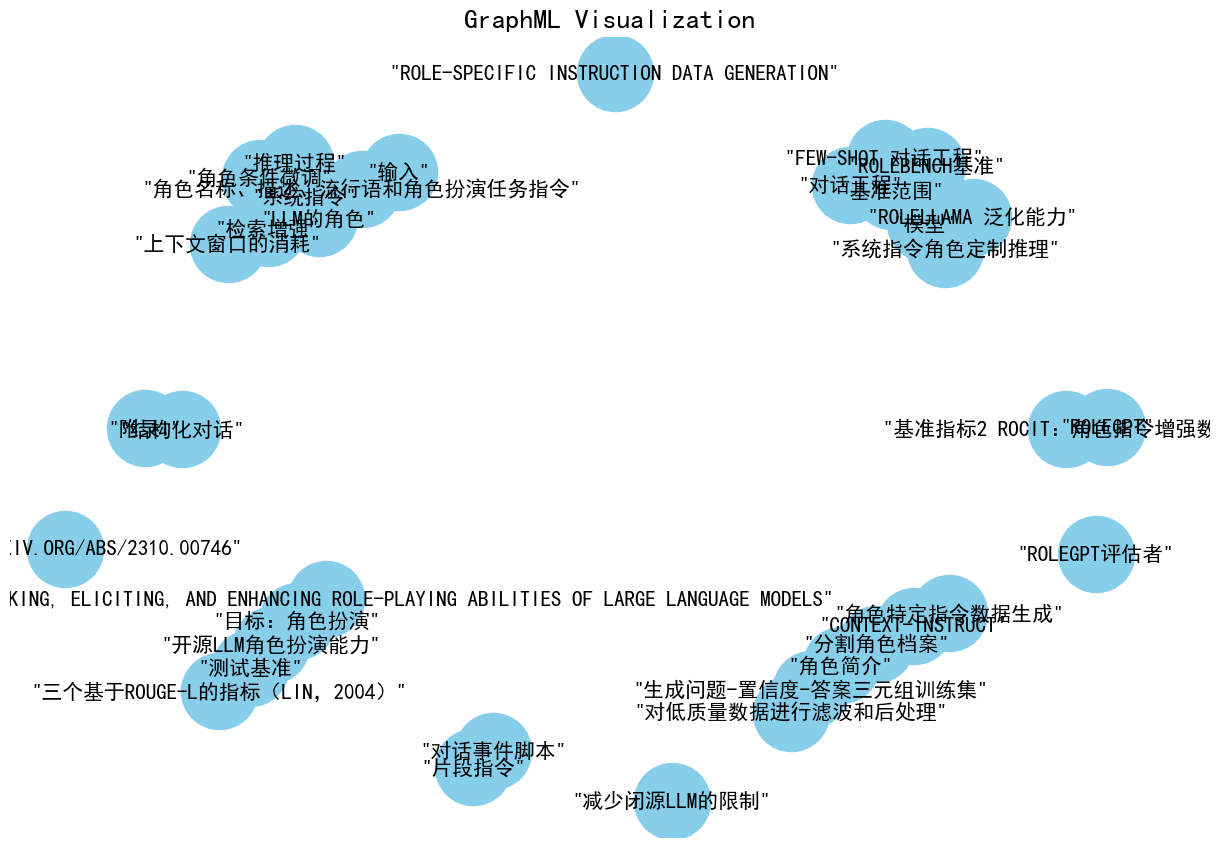

In [28]:
import matplotlib.pyplot as plt
from typing import Any, cast
import os
from pathlib import Path
import networkx as nx
import pandas as pd
from graphrag.index.utils import load_graph
from matplotlib import rcParams
import matplotlib.font_manager as fm 
 

G = load_graph(cast(str | nx.Graph, create_base_entity_graph_df['clustered_graph'][0]))

 # Set the font properties
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['SimHei']  # Use 'Noto Sans CJK' or another font that supports Chinese characters

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=3000, edge_color='gray', font_size=15, font_weight='bold')
plt.title('GraphML Visualization', size=20)
plt.show()


In [29]:
create_base_extracted_entities_df = pd.read_parquet(f"{INPUT_DIR}/create_base_extracted_entities.parquet")
  
create_base_extracted_entities_df.head()

,entity_graph
0,"<graphml xmlns=""http://graphml.graphdrawing.or..."


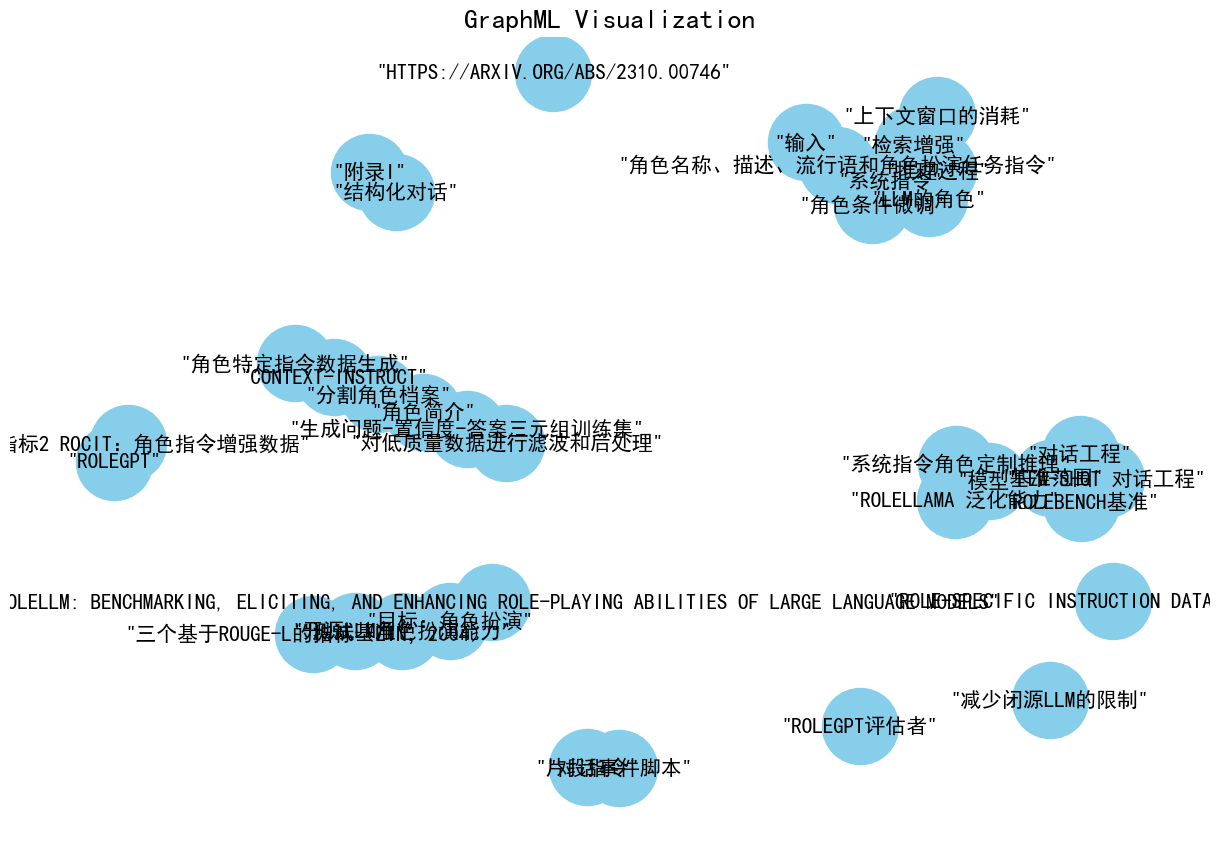

In [30]:
import matplotlib.pyplot as plt
from typing import Any, cast
import os
from pathlib import Path
import networkx as nx
import pandas as pd
from graphrag.index.utils import load_graph
from matplotlib import rcParams
import matplotlib.font_manager as fm 
 

G = load_graph(cast(str | nx.Graph, create_base_extracted_entities_df['entity_graph'][0]))

 # Set the font properties
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['SimHei']  # Use 'Noto Sans CJK' or another font that supports Chinese characters

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=3000, edge_color='gray', font_size=15, font_weight='bold')
plt.title('GraphML Visualization', size=20)
plt.show()


In [31]:
create_summarized_entities_df = pd.read_parquet(f"{INPUT_DIR}/create_summarized_entities.parquet")
  
create_summarized_entities_df.head()

,entity_graph
0,"<graphml xmlns=""http://graphml.graphdrawing.or..."


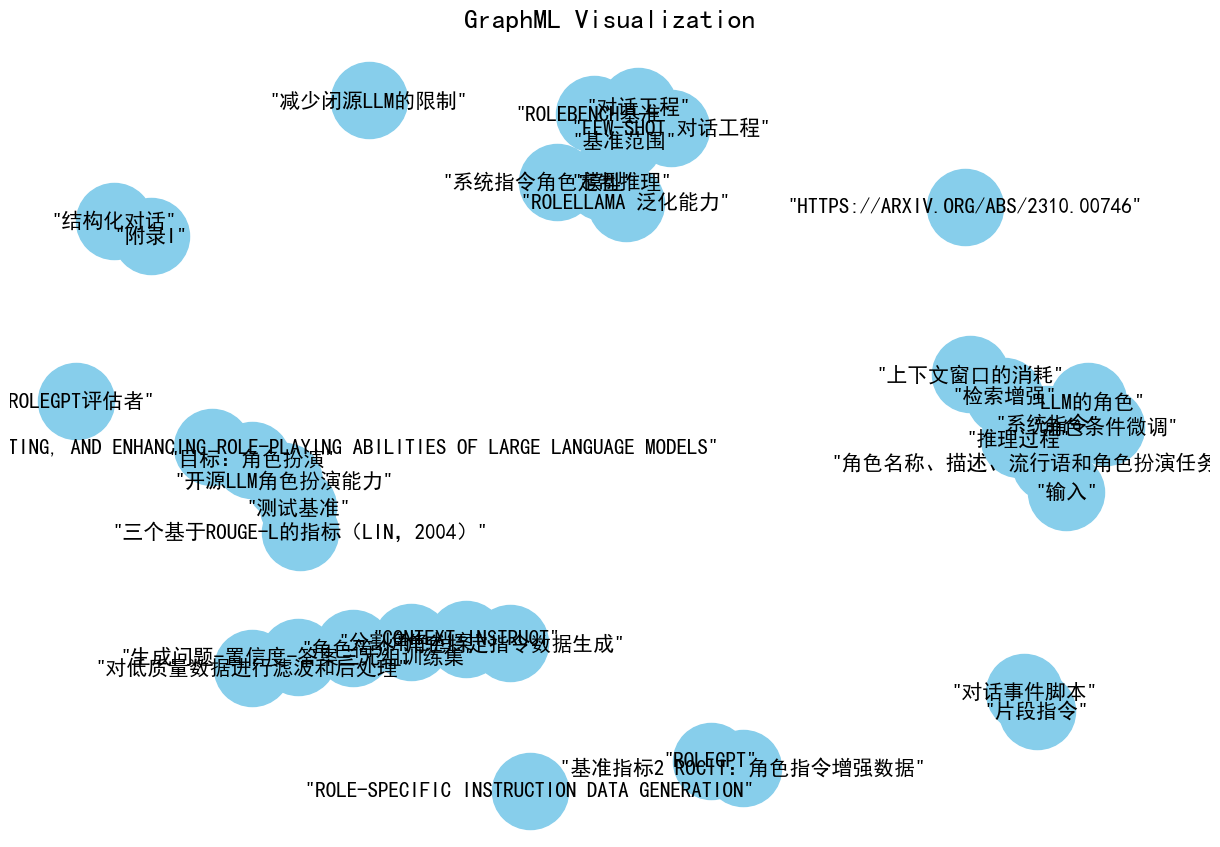

In [32]:
import matplotlib.pyplot as plt
from typing import Any, cast
import os
from pathlib import Path
import networkx as nx
import pandas as pd
from graphrag.index.utils import load_graph
from matplotlib import rcParams
import matplotlib.font_manager as fm 
 

G = load_graph(cast(str | nx.Graph, create_summarized_entities_df['entity_graph'][0]))

 # Set the font properties
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['SimHei']  # Use 'Noto Sans CJK' or another font that supports Chinese characters

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=3000, edge_color='gray', font_size=15, font_weight='bold')
plt.title('GraphML Visualization', size=20)
plt.show()
